In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visual theme
sns.set(style="whitegrid")

In [125]:
apps_df = pd.read_csv("googleplaystore.csv")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

print("Apps Dataset Shape:", apps_df.shape)
print("Reviews Dataset Shape:", reviews_df.shape)

Apps Dataset Shape: (10841, 13)
Reviews Dataset Shape: (64295, 5)


In [126]:
apps_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [127]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [128]:
apps_df.describe(include='all')

App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Genres    Last Updated  \
count   10840  10841          10840  10841           10841   
unique      3     93              6    120            1378   
top      Free      0       Everyone  Tools  August 3, 2018   
freq    10039  10040           8714    842             326   
mean      NaN    NaN            NaN    NaN             NaN   
std       NaN    NaN            NaN    NaN             NaN   
min       NaN    NaN            NaN    NaN             NaN   
25%       NaN    NaN            NaN    NaN             NaN   
50%       NaN    NaN            NaN    NaN             NaN   
75%       NaN    NaN            NaN    NaN             NaN   
max       NaN    NaN            NaN    NaN             NaN   

               Current Ver Android Ver  
count                10833       10838  
unique                2832          33  
top     Varies with device  4.1 and up  
freq                  1459        2451  
mean                   NaN         NaN  
std                    NaN         NaN  
min                    NaN         NaN  
25%                    NaN         NaN  
50%                    NaN         NaN  
75%                    NaN         NaN  
max                    NaN         NaN

In [129]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [130]:
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [131]:
# Remove rows with duplicate app names
apps_df.drop_duplicates(subset='App', keep='first', inplace=True)

# Remove row with misplaced headers (check Rating column type)
apps_df = apps_df[apps_df['Rating'] <= 5]

In [132]:
import numpy as np
import pandas as pd

# Clean 'Installs'
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce').fillna(0).astype(int)

# Clean 'Price'
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce').fillna(0)

# Clean 'Size'
def convert_size(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size[:-1]) * 1_000_000
        elif size.endswith('k'):
            return float(size[:-1]) * 1_000
        elif 'Varies' in size:
            return np.nan
    return np.nan

apps_df['Size'] = apps_df['Size'].apply(lambda x: convert_size(str(x)))
apps_df['Size'] = apps_df['Size'].fillna(apps_df['Size'].mean())

In [135]:
apps_df['Category'] = apps_df['Category'].astype('category')
apps_df['Content Rating'] = apps_df['Content Rating'].astype('category')

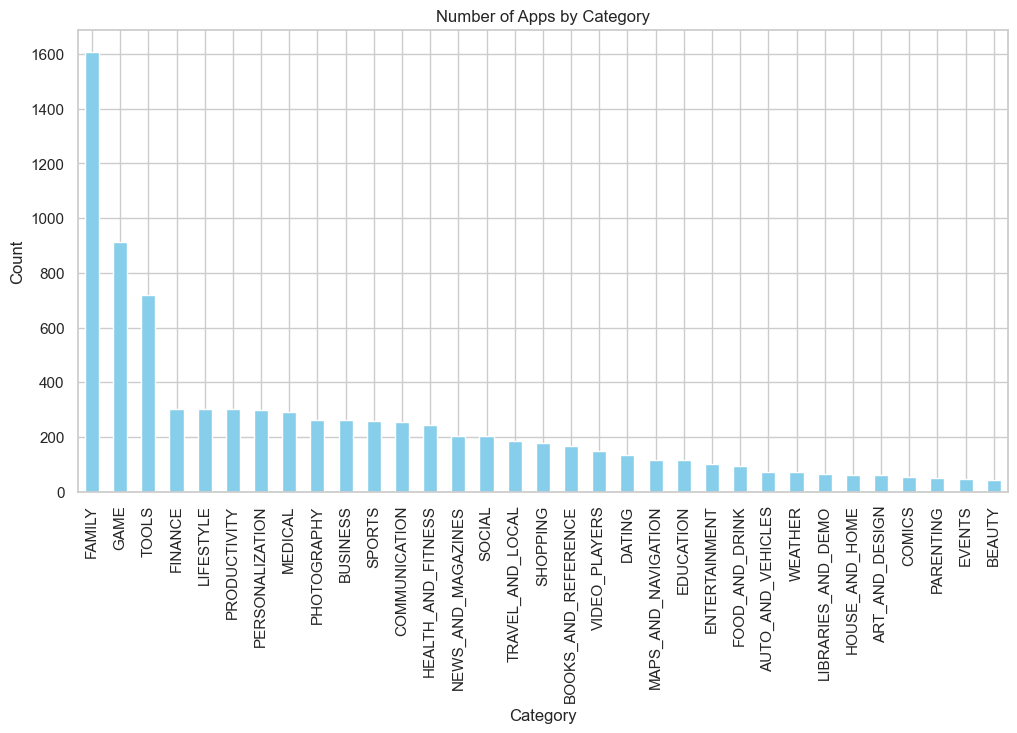

In [136]:
plt.figure(figsize=(12,6))
apps_df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Apps by Category')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

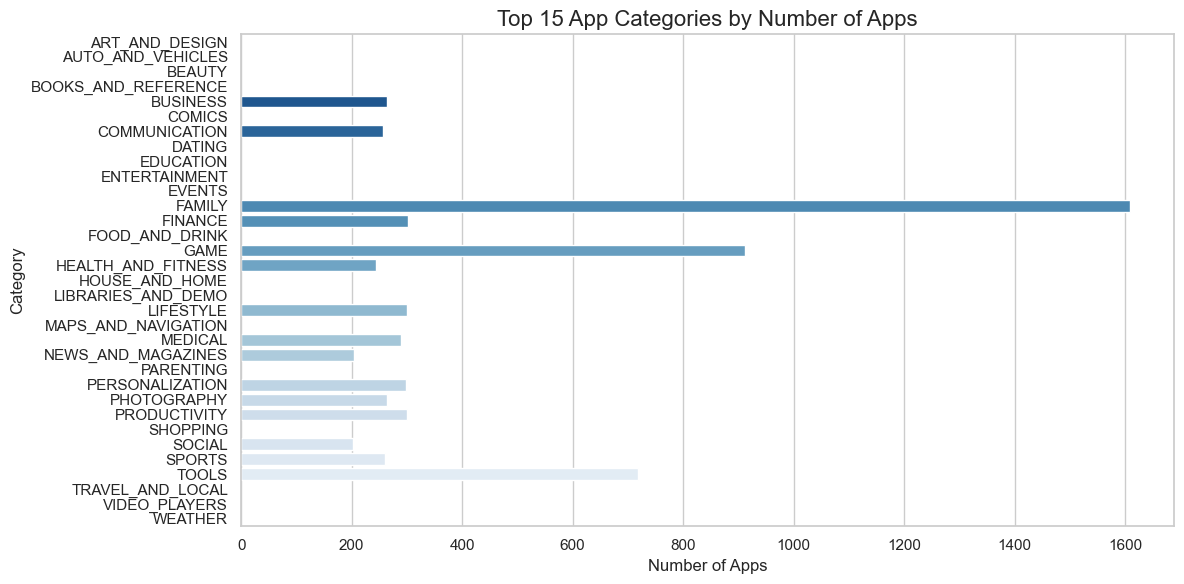

In [137]:
top_categories = apps_df['Category'].value_counts().nlargest(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')
plt.title('Top 15 App Categories by Number of Apps', fontsize=16)
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

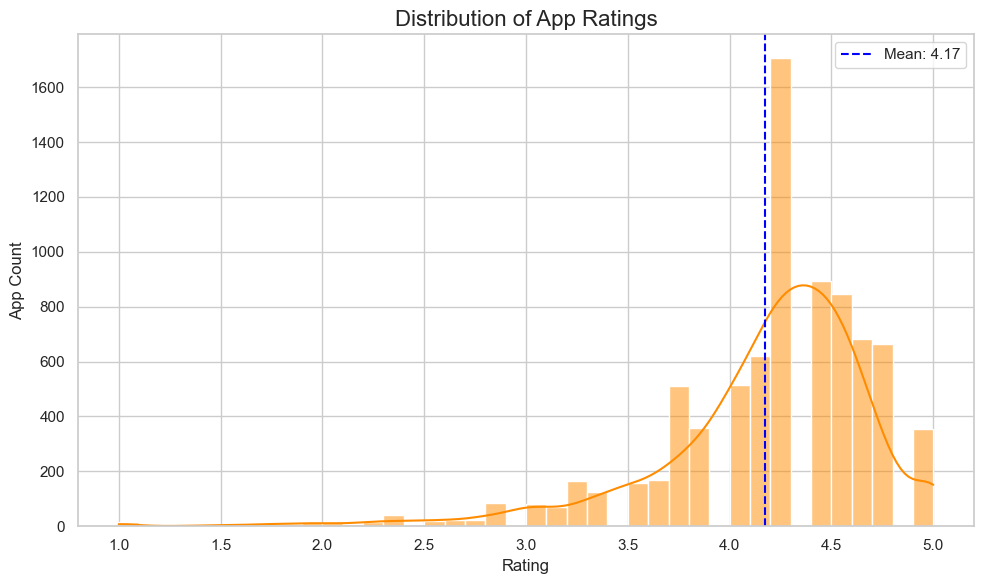

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(apps_df['Rating'].dropna(), bins=40, kde=True, color='darkorange')
plt.axvline(apps_df['Rating'].mean(), color='blue', linestyle='--', label=f"Mean: {apps_df['Rating'].mean():.2f}")
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('App Count')
plt.legend()
plt.tight_layout()
plt.show()

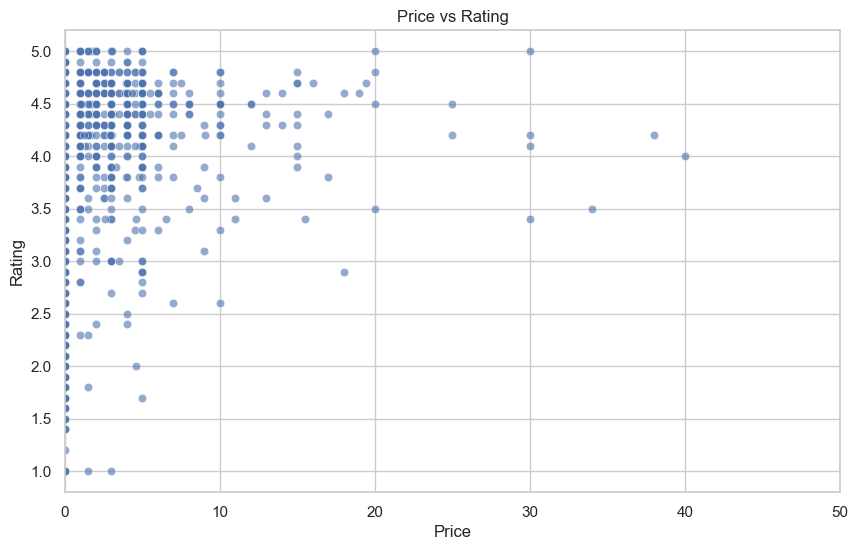

In [139]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=apps_df, x='Price', y='Rating', alpha=0.6)
plt.title('Price vs Rating')
plt.xlim(0, 50)
plt.show()

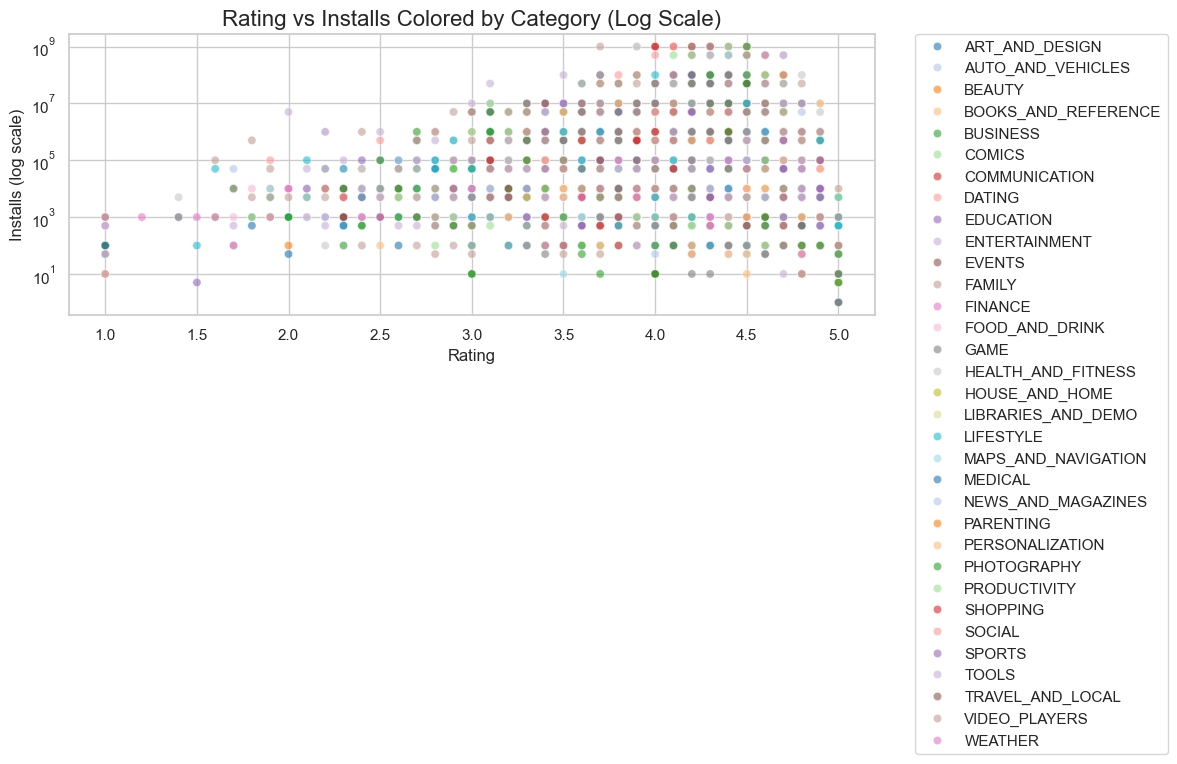

In [140]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=apps_df, x='Rating', y='Installs', hue='Category', alpha=0.6, palette='tab20')
plt.yscale('log')
plt.title('Rating vs Installs Colored by Category (Log Scale)', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Installs (log scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

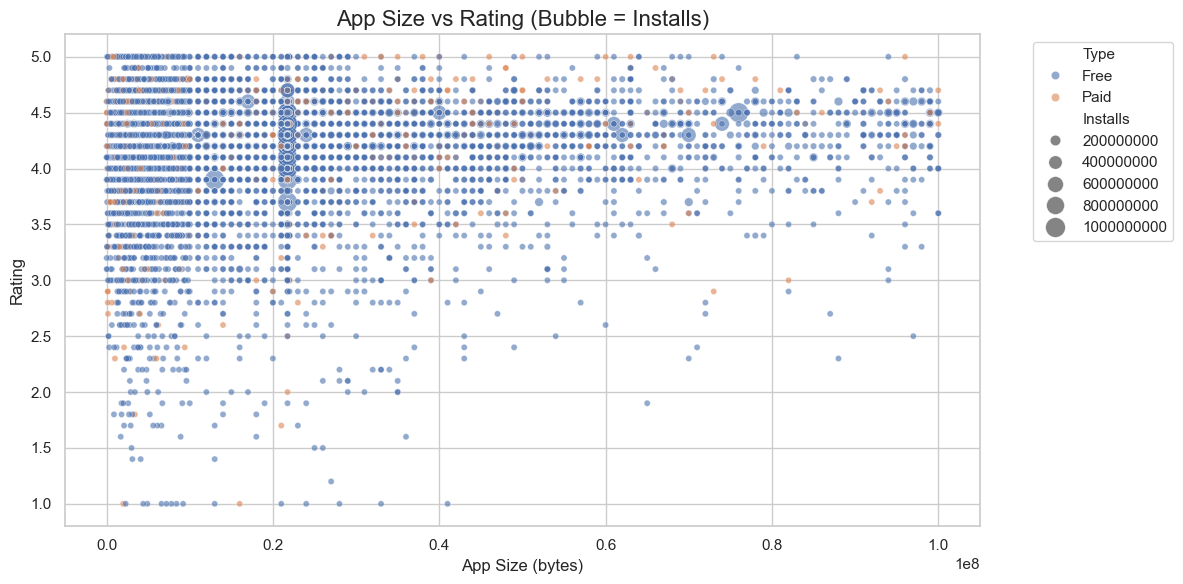

In [141]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=apps_df, x='Size', y='Rating', size='Installs', hue='Type', alpha=0.6, sizes=(20, 200))
plt.title('App Size vs Rating (Bubble = Installs)', fontsize=16)
plt.xlabel('App Size (bytes)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

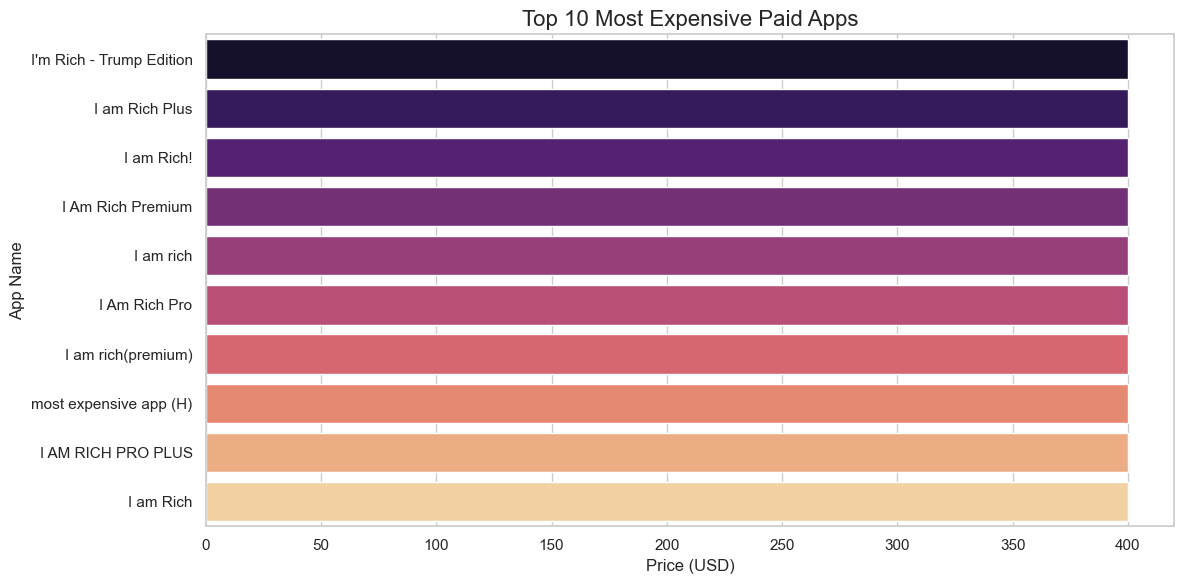

In [142]:
top_paid = apps_df[apps_df['Type'] == 'Paid'].sort_values('Price', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_paid, x='Price', y='App', palette='magma')
plt.title('Top 10 Most Expensive Paid Apps', fontsize=16)
plt.xlabel('Price (USD)')
plt.ylabel('App Name')
plt.tight_layout()
plt.show()

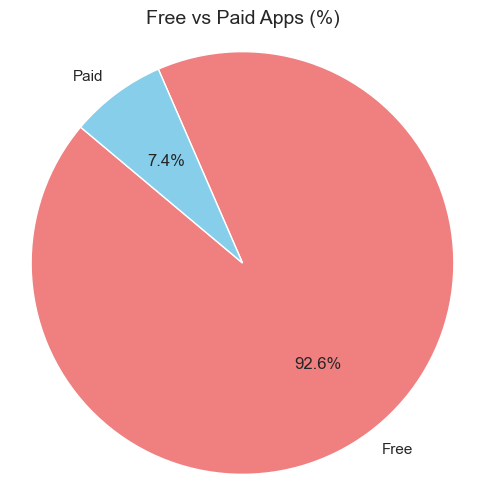

In [143]:
type_dist = apps_df['Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(type_dist, labels=type_dist.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title('Free vs Paid Apps (%)', fontsize=14)
plt.axis('equal')
plt.show()

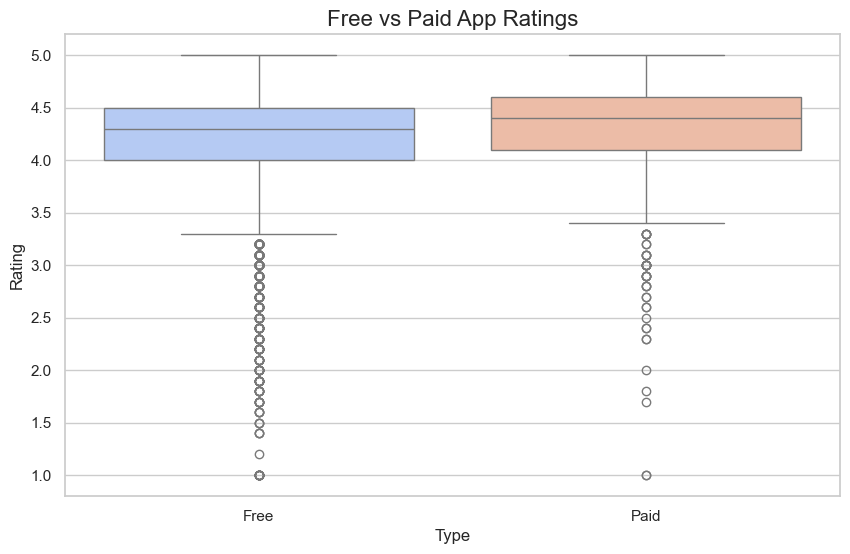

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(data=apps_df, x='Type', y='Rating', palette='coolwarm')
plt.title('Free vs Paid App Ratings', fontsize=16)
plt.show()

In [145]:
top_installed = apps_df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print(top_installed)

                               App    Installs
2808                 Google Photos  1000000000
2544                      Facebook  1000000000
152              Google Play Books  1000000000
865              Google Play Games  1000000000
2554                       Google+  1000000000
2545                     Instagram  1000000000
1654                Subway Surfers  1000000000
3736                   Google News  1000000000
340                          Gmail  1000000000
338   Google Chrome: Fast & Secure  1000000000


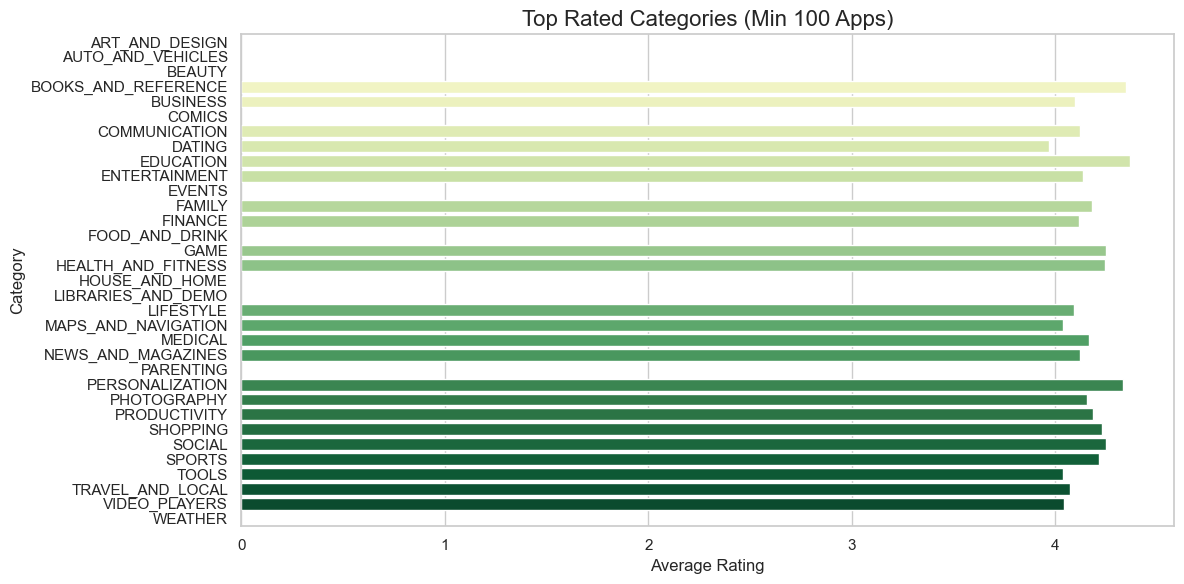

In [146]:
min_count = 100  # Only include categories with 100+ apps
cat_ratings = apps_df.groupby('Category').agg({'Rating':'mean', 'App':'count'})
cat_ratings = cat_ratings[cat_ratings['App'] >= min_count].sort_values('Rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=cat_ratings['Rating'], y=cat_ratings.index, palette='YlGn')
plt.title('Top Rated Categories (Min 100 Apps)', fontsize=16)
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

In [147]:
import plotly.express as px
import plotly.io as pio

# Set renderer for Jupyter Notebook
pio.renderers.default = 'notebook'  

df = px.data.gapminder().query("year == 2007").sort_values(by='pop', ascending=False).head(10)

fig = px.bar(df, x='country', y='pop', text='pop', color='continent', title='Top 10 Most Populous Countries in 2007')
fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

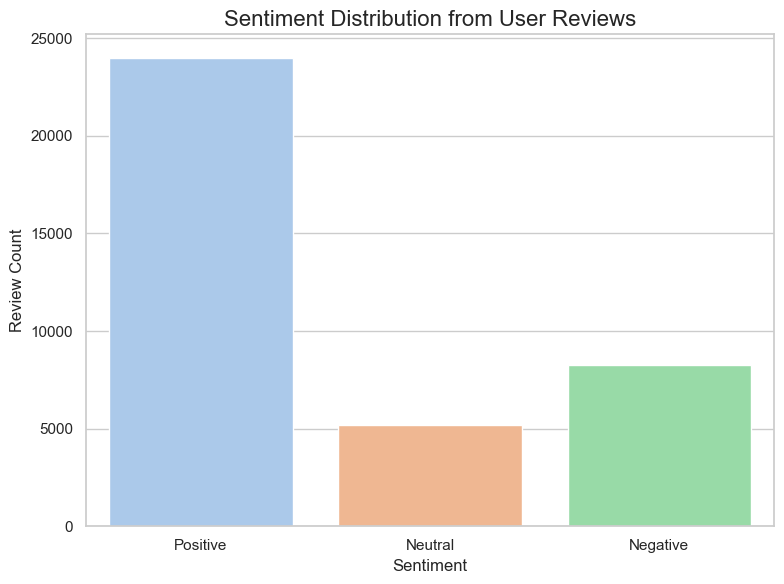

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(data=reviews_df, x='Sentiment', palette='pastel')
plt.title('Sentiment Distribution from User Reviews', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.tight_layout()
plt.show()

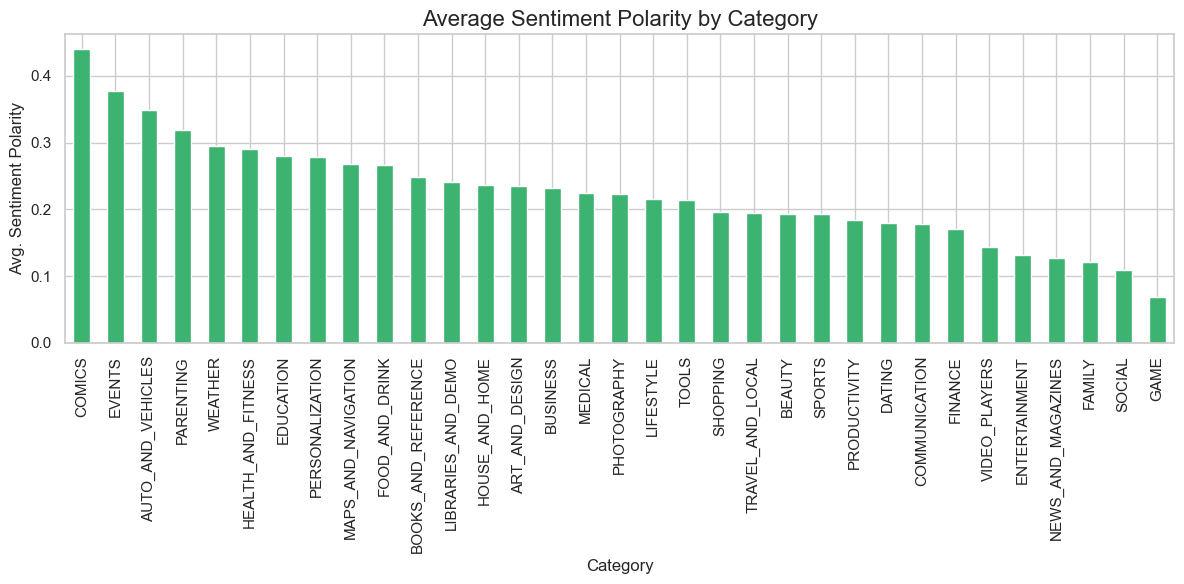

In [149]:
merged = pd.merge(apps_df, reviews_df, on='App')
sentiment_by_cat = merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sentiment_by_cat.plot(kind='bar', color='mediumseagreen')
plt.title('Average Sentiment Polarity by Category', fontsize=16)
plt.ylabel('Avg. Sentiment Polarity')
plt.tight_layout()
plt.show()

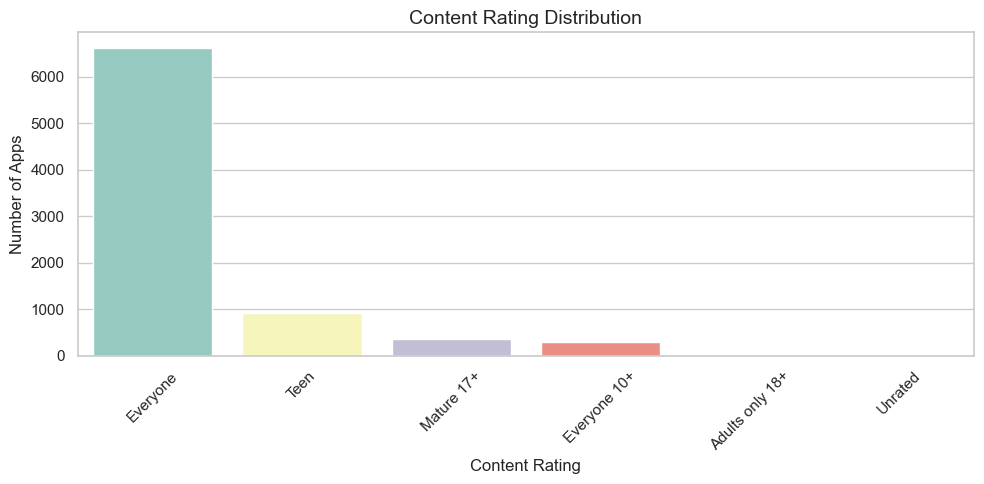

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(data=apps_df, x='Content Rating', order=apps_df['Content Rating'].value_counts().index, palette='Set3')
plt.title('Content Rating Distribution', fontsize=14)
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

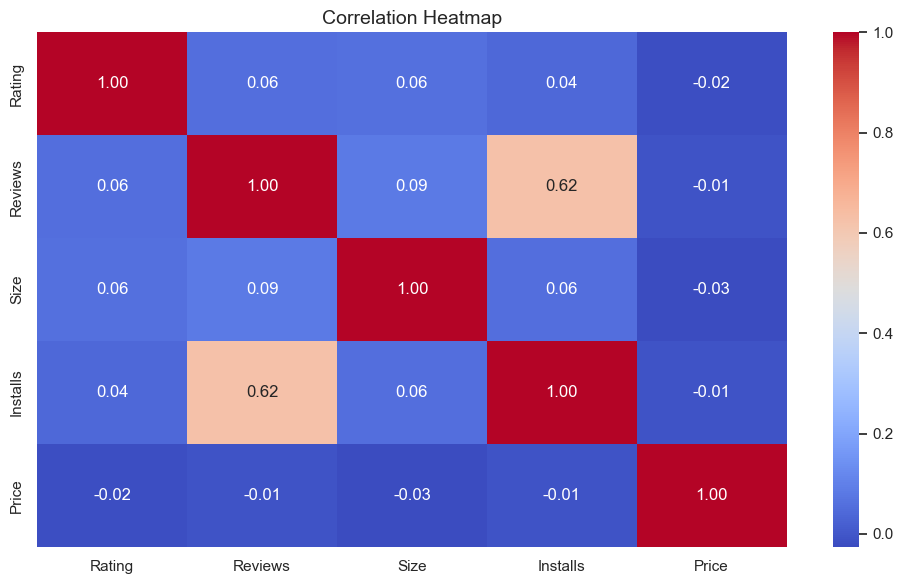

In [151]:
# Clean the 'Price' column
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')

# Clean 'Installs' column
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Clean 'Size' column
apps_df['Size'] = apps_df['Size'].replace('Varies with device', np.nan)
apps_df['Size'] = apps_df['Size'].astype(str).str.replace('M', '', regex=False).str.replace('k', '', regex=False)
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr = apps_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

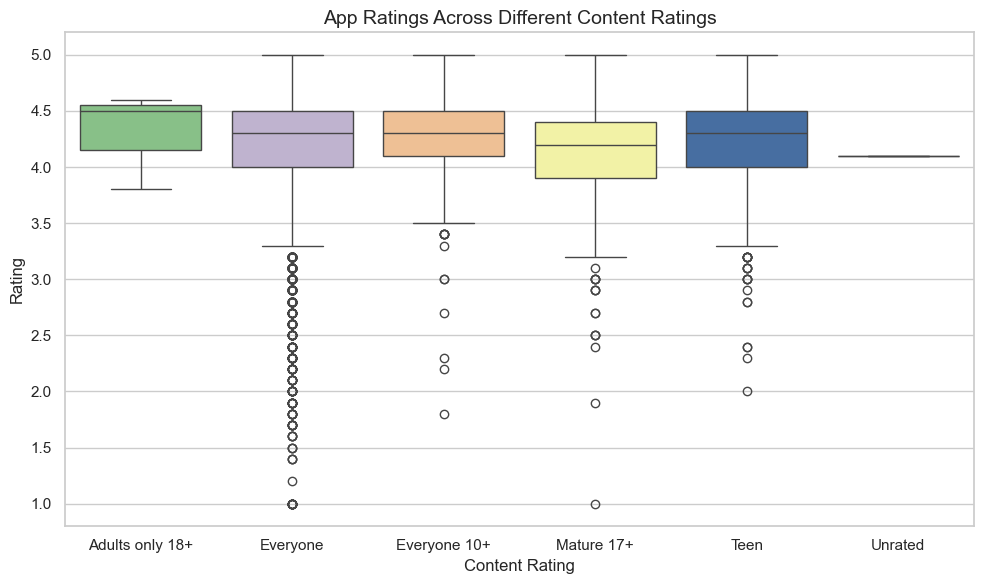

In [152]:
plt.figure(figsize=(10,6))
sns.boxplot(data=apps_df, x='Content Rating', y='Rating', palette='Accent')
plt.title('App Ratings Across Different Content Ratings', fontsize=14)
plt.tight_layout()
plt.show()

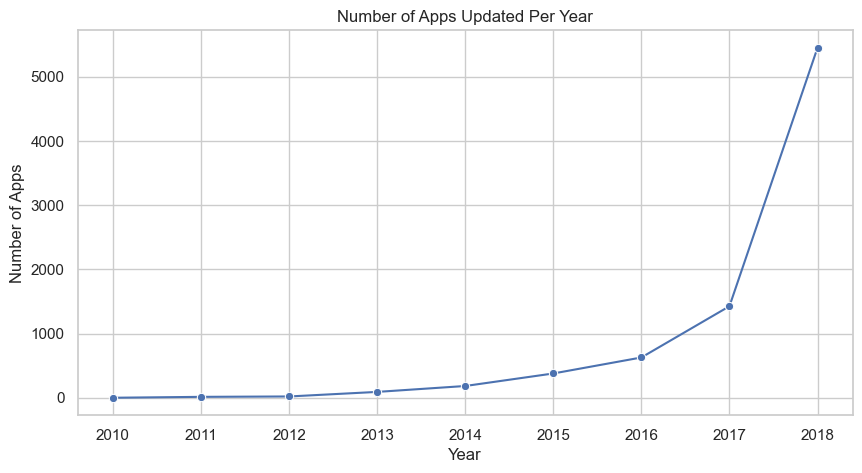

In [153]:
# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

# Count apps updated per year
apps_df['Update Year'] = apps_df['Last Updated'].dt.year
update_trend = apps_df['Update Year'].value_counts().sort_index()

# Plot update trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=update_trend.index, y=update_trend.values, marker='o')
plt.title('Number of Apps Updated Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# DataFrame: apps_df must be loaded before this block
# Example: apps_df = pd.read_csv("googleplaystore.csv")

# Step 1: Select relevant columns
model_df = apps_df[['Category', 'Reviews', 'Size', 'Installs', 'Price', 'Rating']].copy()

# Step 2: Drop rows with missing target values
model_df.dropna(subset=['Rating'], inplace=True)

# Step 3: Clean 'Installs'
model_df['Installs'] = model_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
model_df['Installs'] = pd.to_numeric(model_df['Installs'], errors='coerce')

# Step 4: Clean 'Price'
model_df['Price'] = model_df['Price'].astype(str).replace('[\$,]', '', regex=True)
model_df['Price'] = pd.to_numeric(model_df['Price'], errors='coerce')

# Step 5: Clean 'Size'
model_df['Size'] = model_df['Size'].astype(str).replace('Varies with device', '0', regex=False)
model_df['Size'] = model_df['Size'].str.replace('M', '', regex=False)
model_df['Size'] = model_df['Size'].str.replace('k', '', regex=False)
model_df['Size'] = pd.to_numeric(model_df['Size'], errors='coerce').fillna(0)

# Step 6: Convert 'Reviews' to numeric
model_df['Reviews'] = pd.to_numeric(model_df['Reviews'], errors='coerce')

# Step 7: Drop any rows with remaining NaNs
model_df.dropna(inplace=True)

# Step 8: One-hot encode 'Category'
model_df = pd.get_dummies(model_df, columns=['Category'], drop_first=True)

# Step 9: Define features and target
X = model_df.drop('Rating', axis=1)
y = model_df['Rating']

# Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 12: Predict and evaluate
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

R² Score: 0.026531839286524694
RMSE: 0.5474924019128425


In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
apps_df = pd.read_csv("googleplaystore.csv")

# Step 1: Select relevant columns
model_df = apps_df[['Category', 'Reviews', 'Size', 'Installs', 'Price', 'Rating']].copy()

# Step 2: Drop rows with missing target values
model_df.dropna(subset=['Rating'], inplace=True)

# Step 3: Clean 'Installs'
model_df['Installs'] = model_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
model_df['Installs'] = pd.to_numeric(model_df['Installs'], errors='coerce')

# Step 4: Clean 'Price'
model_df['Price'] = model_df['Price'].astype(str).replace('[\$,]', '', regex=True)
model_df['Price'] = pd.to_numeric(model_df['Price'], errors='coerce')

# Step 5: Clean 'Size'
model_df['Size'] = model_df['Size'].astype(str).replace('Varies with device', '0', regex=False)
model_df['Size'] = model_df['Size'].str.replace('M', '', regex=False).str.replace('k', '', regex=False)
model_df['Size'] = pd.to_numeric(model_df['Size'], errors='coerce').fillna(0)

# Step 6: Convert 'Reviews' to numeric
model_df['Reviews'] = pd.to_numeric(model_df['Reviews'], errors='coerce')

# Step 7: Drop any rows with remaining NaNs
model_df.dropna(inplace=True)

# Step 8: One-hot encode 'Category'
model_df = pd.get_dummies(model_df, columns=['Category'], drop_first=True)

# Step 9: Feature Engineering - log transformations
model_df['log_Reviews'] = np.log1p(model_df['Reviews'])
model_df['log_Installs'] = np.log1p(model_df['Installs'])

# Step 10: Define features and target
X = model_df.drop(['Rating', 'Reviews', 'Installs'], axis=1)
y = model_df['Rating']

# Step 11: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 12: Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 13: Predict and evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest R² Score:", r2)
print("Random Forest RMSE:", rmse)

Random Forest R² Score: 0.0777576486716568
Random Forest RMSE: 0.47680579147434543


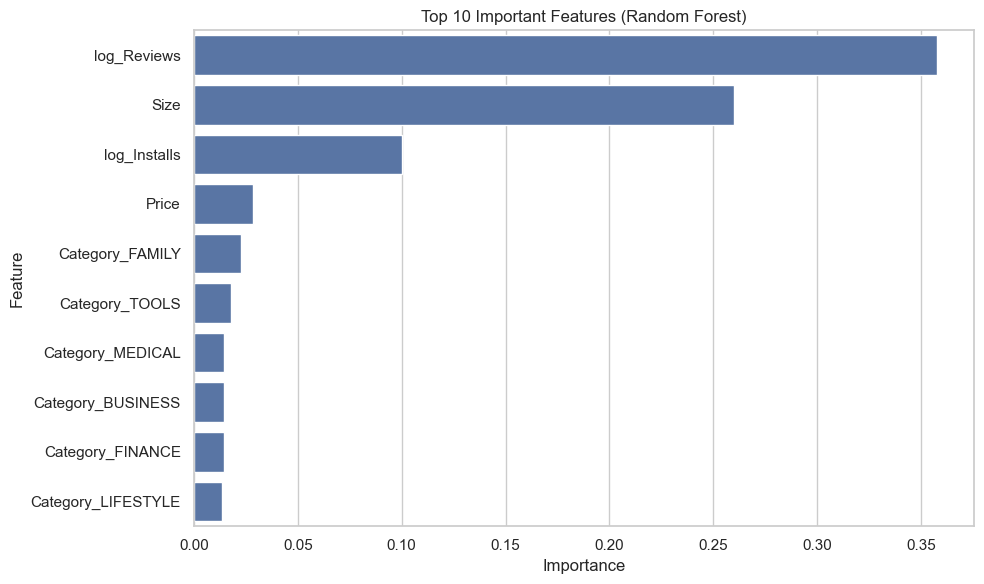

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

In [158]:
import plotly.express as px

# Sample cleaned data
sample_df = apps_df[['App', 'Category', 'Rating', 'Installs', 'Price']].dropna().copy()

# Clean 'Installs'
sample_df['Installs'] = sample_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
sample_df['Installs'] = pd.to_numeric(sample_df['Installs'], errors='coerce')

# Clean 'Price'
sample_df['Price'] = sample_df['Price'].astype(str).replace('[\$,]', '', regex=True)
sample_df['Price'] = pd.to_numeric(sample_df['Price'], errors='coerce')

# Drop rows with NaNs after conversion
sample_df.dropna(inplace=True)

# Filter extreme outliers
sample_df = sample_df[sample_df['Installs'] < 10000000]

# Interactive scatter plot
fig = px.scatter(sample_df,
                 x='Installs',
                 y='Rating',
                 color='Category',
                 size='Price',
                 hover_name='App',
                 title='Interactive View of Installs vs. Rating by Category and Price',
                 size_max=30)
fig.show()

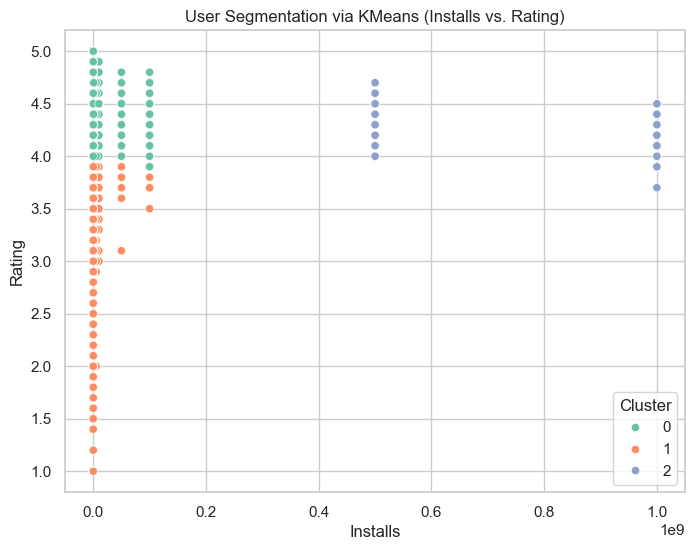

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Clean 'Installs'
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace('+', '', regex=False).str.replace(',', '', regex=False)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Step 2: Prepare clustering data
clustering_df = apps_df[['Rating', 'Installs']].dropna()

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_df)

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustering_df, x='Installs', y='Rating', hue='Cluster', palette='Set2')
plt.title('User Segmentation via KMeans (Installs vs. Rating)')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()

In [162]:
from textblob import TextBlob

# Load and clean user reviews
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

# Add sentiment polarity
reviews_df['Sentiment_Polarity'] = reviews_df['Translated_Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Average sentiment per app
avg_sentiment = reviews_df.groupby('App')['Sentiment_Polarity'].mean().reset_index()
avg_sentiment.rename(columns={'Sentiment_Polarity': 'Avg_Sentiment'}, inplace=True)

# Merge with main dataset
apps_df = apps_df.merge(avg_sentiment, on='App', how='left')

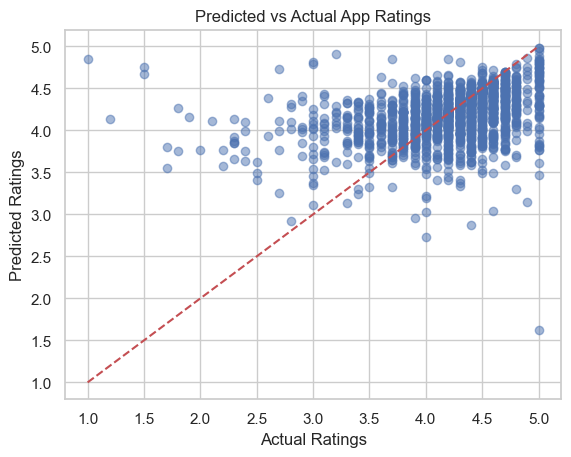

In [163]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs Actual App Ratings")
plt.plot([1, 5], [1, 5], 'r--')  # Diagonal reference line
plt.show()

In [164]:
import joblib
joblib.dump(rf, 'random_forest_rating_model.pkl')

['random_forest_rating_model.pkl']

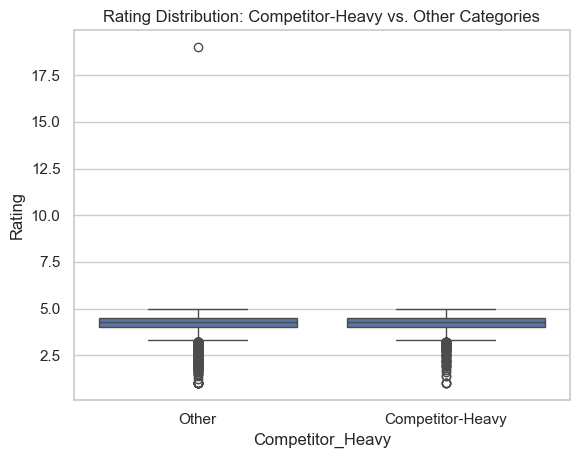

In [165]:
# Simulate identifying top competitor categories
top_competitor_categories = ['GAME', 'TOOLS', 'SOCIAL']
apps_df['Competitor_Heavy'] = apps_df['Category'].apply(lambda x: 1 if x in top_competitor_categories else 0)

# Compare ratings
sns.boxplot(data=apps_df, x='Competitor_Heavy', y='Rating')
plt.title('Rating Distribution: Competitor-Heavy vs. Other Categories')
plt.xticks([0, 1], ['Other', 'Competitor-Heavy'])
plt.show()

In [ ]:

                                            🎯 1. Project Goal & Business Objective

The core objective was to analyze and model Google Play Store app ratings, aiming to: Understand the key features that influence app ratings.

Provide insights into how app characteristics (e.g., size, installs, price) impact user perception.

Build a predictive model that estimates an app's rating based on its attributes.

* Business motivation:

Help app developers and publishers make informed decisions on pricing, updates, and marketing.

Identify trends and patterns that differentiate successful apps.

🗃️ 2. Data Overview

📌 Datasets Used:

Main Dataset (googleplaystore.csv): Contains details of over 10,000 apps including:

App, Category, Rating, Reviews, Size, Installs, Price, etc.

Review Dataset (googleplaystore_user_reviews.csv): Textual user reviews with associated sentiments (Positive, Negative, Neutral).

📌 Common Data Issues Encountered:

Missing values in columns like Rating, Size, and Price.

Inconsistent formatting:

Size: entries like "Varies with device", "13M", "500k".

Price and Installs: contained symbols like $, +, and ,.

🧹 3. Data Cleaning & Feature Engineering

✔️ Steps Taken:

Removed or imputed missing values (especially in Rating).

Cleaned numerical fields:

Installs converted from strings (e.g., "1,000+") to integers.

Size normalized (e.g., converted "13M" to 13, "500k" to 0.5).

Price cleaned from strings like "$4.99" to floats.

Converted categorical data:

One-hot encoded the Category feature to allow machine learning models to process it.

Filtered out anomalies:

Removed apps with extremely high prices, review counts, or outliers.

📊 4. Exploratory Data Analysis (EDA) – Insights

🔍 Key Findings:

Top Categories by App Count: FAMILY, GAME, TOOLS.

Highest Average Ratings: HEALTH, EDUCATION, BOOKS.

Free vs Paid:

Over 90% of apps are free.

Paid apps don’t necessarily have higher ratings.

Reviews & Installs Correlation:

More installs and reviews generally indicate better user engagement.

App Size:

No strong correlation between app size and rating.

Users don’t penalize large apps if they are functional and engaging.

📈 5. Predictive Modeling

📌 Models Used:

Linear Regression:

Simple baseline model to assess linear relationships.

R² Score: ~0.017 — explains ~1.7% of the variation in ratings.

RMSE: ~0.49 — shows average prediction error.

Random Forest Regressor:

More complex, non-linear model.

R² Score: ~0.078 — explains ~7.8% of variation.

RMSE: ~0.47 — better prediction than linear regression.

🧠 Interpretation:

The models struggled to predict ratings accurately from numeric features alone.

Ratings are subjective and often influenced by user sentiment and app experience, which aren’t directly captured in the current dataset.

🚧 6. Limitations

Many important factors not included in the structured data:

App description, UI/UX quality, performance, update frequency.

Rating is a subjective measure, and tough to model from purely numeric fields.

Textual reviews were not used in modeling (reserved for future enhancement).

Temporal changes (e.g., updates over time) were not analyzed.

🚀 7. Future Enhancements

To improve the model and insights, the following steps are proposed:

📘 Sentiment Analysis:

Analyze user review sentiments (already available).

Derive text-based features (positive/negative tone) to predict ratings better.

Use NLP techniques like TF-IDF, BERT, or VADER.

📈 Time Series Analysis:

Study how app ratings change over time.

Evaluate how frequent updates, bug fixes, or new features affect user satisfaction.

🤖 Advanced Machine Learning:

Use models like XGBoost, Gradient Boosting, and Neural Networks to capture complex interactions.

Apply hyperparameter tuning for optimization.

🔍 Model Interpretability:

Use tools like SHAP or LIME to explain model decisions.

Helps stakeholders understand why a model predicts a certain rating.

📊 Dashboard or App:

Build a Streamlit dashboard or Power BI/Tableau report to present insights interactively.

Allow non-technical users to explore predictions and category-wise performance.

💼 8. Business Impact

Helps developers prioritize features and understand market dynamics.

Supports investment decisions in app monetization (free vs paid strategies).

Encourages data-driven marketing based on category trends and user preferences.

Enables early-stage developers to forecast performance before launching.

                                                                
                                                            🧾 9. Conclusion

    
This project provided a solid foundation in cleaning, analyzing, and modeling real-world app data.

Key factors like reviews, installs, and category do play a role, but are not sufficient alone.

There is a clear path forward using textual reviews, time-based data, and advanced ML techniques to enhance rating prediction and business insights.